In [41]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pathlib
import xmltodict

In [42]:
run = 'java -jar simian.jar'

os.system(
    f"{run} -reportDuplicateText+ -formatter=xml:duplicates_py -threshold=4 $(find ../openlibrary/ -type f -name '*.py')")
os.system(
    f"{run} -reportDuplicateText+ -ignoreIdentifiers+ -ignoreLiterals+ -balanceParentheses+ -formatter=xml:duplicates_js -threshold=4 $(find ../openlibrary/ -type f -name '*.js')")
os.system(
    f"{run} -reportDuplicateText+ -formatter=xml:duplicates_html -threshold=4 $(find ../openlibrary/ -type f -name '*.html')")

Simian Similarity Analyzer 4.0.0 - https://simian.quandarypeak.com
Copyright (c) 2023 Quandary Peak Research. All rights reserved.
Subject to the Quandary Peak Academic Software License.
Simian Similarity Analyzer 4.0.0 - https://simian.quandarypeak.com
Copyright (c) 2023 Quandary Peak Research. All rights reserved.
Subject to the Quandary Peak Academic Software License.
Simian Similarity Analyzer 4.0.0 - https://simian.quandarypeak.com
Copyright (c) 2023 Quandary Peak Research. All rights reserved.
Subject to the Quandary Peak Academic Software License.


256

In [43]:
def get_directory(type, path):
    return path.removesuffix(os.path.basename(path))
    
    if type == 'html':
        return path[:path.index(os.sep)] if os.sep in path else 'root'
    elif type == 'py' or type == 'js':
        if 'plugins' in path:
            path = path.removeprefix('plugins/')
            path = path.removeprefix('openlibrary/js/')
            directory = f'plugins/{path[:path.index(os.sep)]}' if os.sep in path else 'plugins'
        else:
            directory = f'{path[:path.index(os.sep)]}' if os.sep in path else 'root'

        return directory


def parse(type):
    with open(f'duplicates_{type}') as fd:
        doc = xmltodict.parse(fd.read())

    duplicates = []

    for element in doc['simian']['check']['set']:
        for block in element['block']:
            directory = f'{pathlib.Path(os.path.abspath("notebook.ipynb")).parent.parent.resolve()}/openlibrary/'
            path = block['@sourceFile'].removeprefix(directory)

            entry = {
                'fingerprint': element['@fingerprint'],
                'line_count': element['@lineCount'],
                'file': path,
                'directory': get_directory(type, path),
                'start_line': block['@startLineNumber'],
                'end_line': block['@endLineNumber'],
            }
            duplicates.append(entry)

    with open(f'duplicates_{type}.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile,
                                fieldnames=['fingerprint', 'line_count', 'file', 'directory', 'start_line', 'end_line'])
        writer.writeheader()
        writer.writerows(duplicates)

In [44]:
parse("py")
parse("js")
parse("html")

In [45]:
df_py = pd.read_csv('duplicates_py.csv')
df_py

,fingerprint,line_count,file,directory,start_line,end_line
0,a794f3b4f5c7fe4fe3689f283408157d,4,core/imports.py,core/,415,418
1,a794f3b4f5c7fe4fe3689f283408157d,4,core/imports.py,core/,352,355
2,1744565928c57f6ce74490e62d115739,4,i18n/__init__.py,i18n/,187,191
3,1744565928c57f6ce74490e62d115739,4,i18n/__init__.py,i18n/,172,176
4,4bb319f9552fd9a9addd1897573eb7ac,4,catalog/utils/__init__.py,catalog/utils/,343,346
...,...,...,...,...,...,...
925,32995f85806bef1de11215104a38ebe1,22,plugins/upstream/tests/test_addbook.py,plugins/upstream/tests/,204,228
926,dd3889a557dda38077987868fa0f60ed,23,plugins/upstream/tests/test_addbook.py,plugins/upstream/tests/,167,192
927,dd3889a557dda38077987868fa0f60ed,23,plugins/upstream/tests/test_addbook.py,plugins/upstream/tests/,314,339
928,944217f12abb6a5c7affe9a98c3c9696,24,core/observations.py,core/,294,317


In [46]:
df_py.groupby('directory')['fingerprint'].count()

directory
accounts/                        6
admin/                          11
catalog/add_book/                5
catalog/add_book/tests/        135
catalog/marc/                    8
catalog/marc/tests/             19
catalog/utils/                   3
core/                          129
core/lists/                      1
coverstore/                     13
coverstore/tests/                4
data/                            4
i18n/                            4
mocks/                           2
mocks/tests/                     3
olbase/tests/                    6
plugins/                         7
plugins/admin/                   1
plugins/books/                   8
plugins/books/tests/            15
plugins/importapi/              16
plugins/importapi/tests/         6
plugins/openlibrary/            58
plugins/openlibrary/tests/      25
plugins/upstream/               58
plugins/upstream/tests/        130
plugins/worksearch/             14
plugins/worksearch/schemes/     28
plugins/wo

In [59]:
df_py.groupby('directory')['fingerprint'].count()

directory
accounts/                        6
admin/                          11
catalog/add_book/                5
catalog/add_book/tests/        135
catalog/marc/                    8
catalog/marc/tests/             19
catalog/utils/                   3
core/                          129
core/lists/                      1
coverstore/                     13
coverstore/tests/                4
data/                            4
i18n/                            4
mocks/                           2
mocks/tests/                     3
olbase/tests/                    6
plugins/                         7
plugins/admin/                   1
plugins/books/                   8
plugins/books/tests/            15
plugins/importapi/              16
plugins/importapi/tests/         6
plugins/openlibrary/            58
plugins/openlibrary/tests/      25
plugins/upstream/               58
plugins/upstream/tests/        130
plugins/worksearch/             14
plugins/worksearch/schemes/     28
plugins/wo

<Axes: title={'center': 'Duplicate blocks per directory'}, xlabel='directory'>

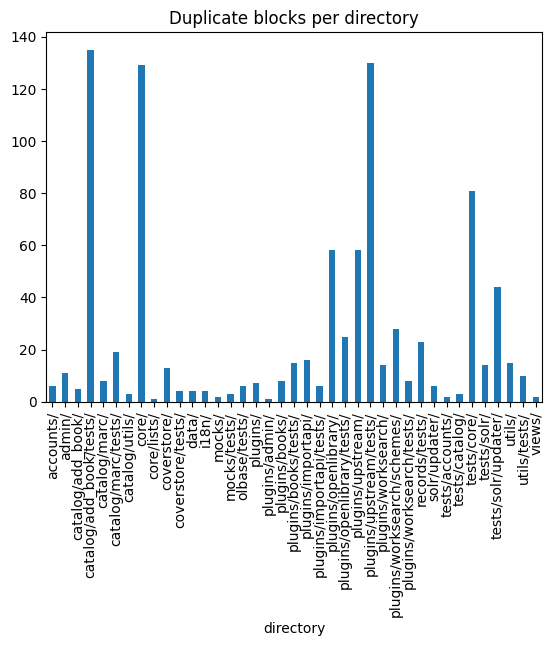

In [48]:
df_py.groupby('directory')['fingerprint'].count().plot(kind='bar', title='Duplicate blocks per directory')

In [49]:
df_py.groupby('directory')['line_count'].mean('line_count')

directory
accounts/                      4.166667
admin/                         4.909091
catalog/add_book/              5.800000
catalog/add_book/tests/        5.911111
catalog/marc/                  5.250000
catalog/marc/tests/            5.578947
catalog/utils/                 4.000000
core/                          5.503876
core/lists/                    4.000000
coverstore/                    4.384615
coverstore/tests/              6.250000
data/                          4.500000
i18n/                          4.000000
mocks/                         6.000000
mocks/tests/                   5.000000
olbase/tests/                  5.000000
plugins/                       4.142857
plugins/admin/                 4.000000
plugins/books/                 5.375000
plugins/books/tests/           5.866667
plugins/importapi/             7.375000
plugins/importapi/tests/       4.666667
plugins/openlibrary/           4.500000
plugins/openlibrary/tests/     7.920000
plugins/upstream/             

<Axes: title={'center': 'Average duplicate length per directory'}, xlabel='directory'>

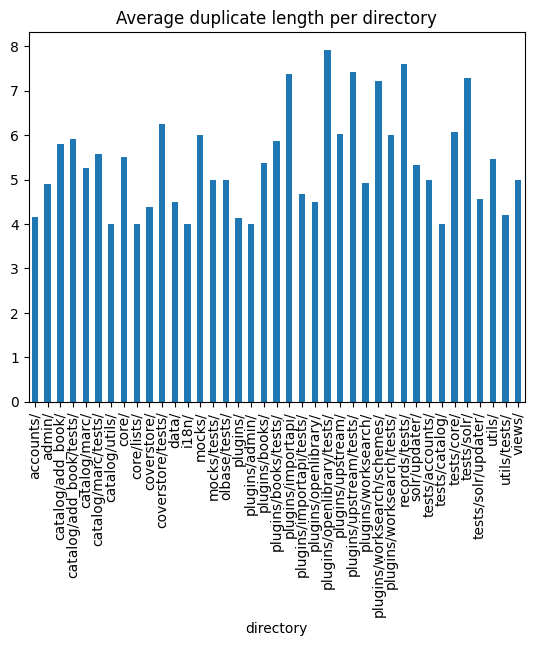

In [50]:
df_py.groupby('directory')['line_count'].mean('line_count').plot(kind='bar', title='Average duplicate length per directory')

In [51]:
data = []

for name, group in df_py.groupby('fingerprint'):
    has_test = False

    for index, row in group.iterrows():
        if 'tests' in row['file']:
            has_test = True
            break

    data.append([name, group.iloc[0]['file'], has_test])

pd.DataFrame(data, columns=['fingerprint', 'file', 'has_test'])

,fingerprint,file,has_test
0,0070389ce7fb9ed34ff5d6072efc97b8,catalog/marc/tests/test_get_subjects.py,True
1,02950d0243155622d387784aa33e4165,catalog/marc/tests/test_marc.py,True
2,0323eb008b90070ca7a16229dcec84ac,coverstore/tests/test_webapp.py,True
3,0421a8fac7933f1dae79475746d08762,catalog/add_book/tests/test_add_book.py,True
4,049eb52c52a526479ca8a79d119d2b02,plugins/worksearch/code.py,False
...,...,...,...
390,fdc5111ed598c9bd24a933ec9a0c08d7,catalog/add_book/tests/test_match.py,True
391,fdd838477af78fd87e075232ed28ded2,utils/tests/test_lcc.py,True
392,fef6af6f04a14ce454887fdc1d8cec87,plugins/openlibrary/code.py,False
393,ff3fac30014bb92de19ed2985db18513,plugins/upstream/tests/test_addbook.py,True


In [52]:
df_js = pd.read_csv('duplicates_js.csv')
df_js

,fingerprint,line_count,file,directory,start_line,end_line
0,c7d45b235db7eee39a7a330947ed3b64,4,plugins/openlibrary/js/merge-request-table/Mer...,plugins/openlibrary/js/merge-request-table/Mer...,67,85
1,c7d45b235db7eee39a7a330947ed3b64,4,plugins/openlibrary/js/dropper/Dropper.js,plugins/openlibrary/js/dropper/,49,73
2,c7d45b235db7eee39a7a330947ed3b64,4,plugins/openlibrary/js/bulk-tagger/BulkTagger.js,plugins/openlibrary/js/bulk-tagger/,76,95
3,65c5784637515e788c041a6ebb61da92,4,plugins/openlibrary/js/my-books/MyBooksDropper...,plugins/openlibrary/js/my-books/MyBooksDropper/,257,262
4,65c5784637515e788c041a6ebb61da92,4,plugins/openlibrary/js/edition-nav-bar/Edition...,plugins/openlibrary/js/edition-nav-bar/,123,127
...,...,...,...,...,...,...
251,00da3b0763d38b3bd0c1120e494eabac,12,plugins/openlibrary/js/my-books/store/index.js,plugins/openlibrary/js/my-books/store/,26,62
252,cfcd208495d565ef66e7dff9f98764da,16,plugins/openlibrary/js/index.js,plugins/openlibrary/js/,31,47
253,cfcd208495d565ef66e7dff9f98764da,16,plugins/openlibrary/js/index.js,plugins/openlibrary/js/,30,46
254,856af821f4c0ee3bafa3559e72e04621,19,plugins/openlibrary/js/graphs/options.js,plugins/openlibrary/js/graphs/,1,19


<Axes: title={'center': 'Duplicate blocks per directory'}, xlabel='directory'>

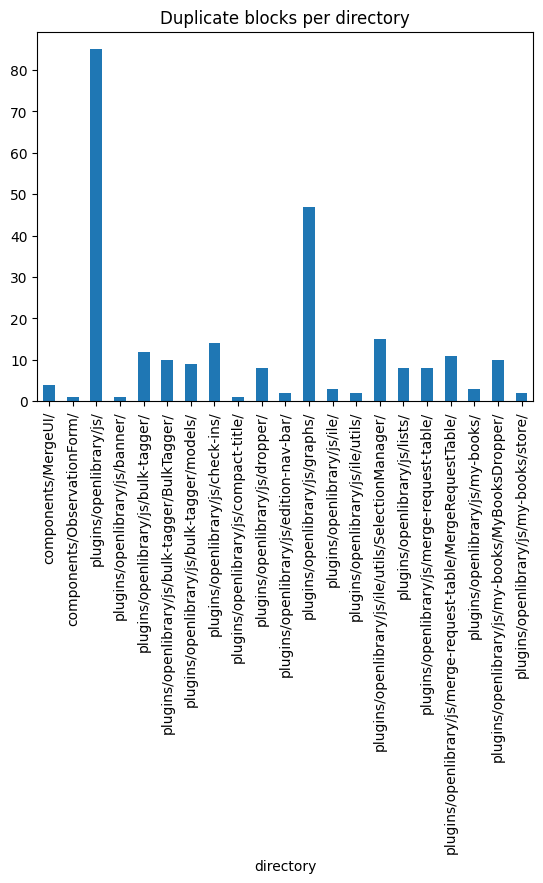

In [53]:
df_js.groupby('directory')['fingerprint'].count().plot(kind='bar', title='Duplicate blocks per directory')

<Axes: title={'center': 'Average line count per directory'}, xlabel='directory'>

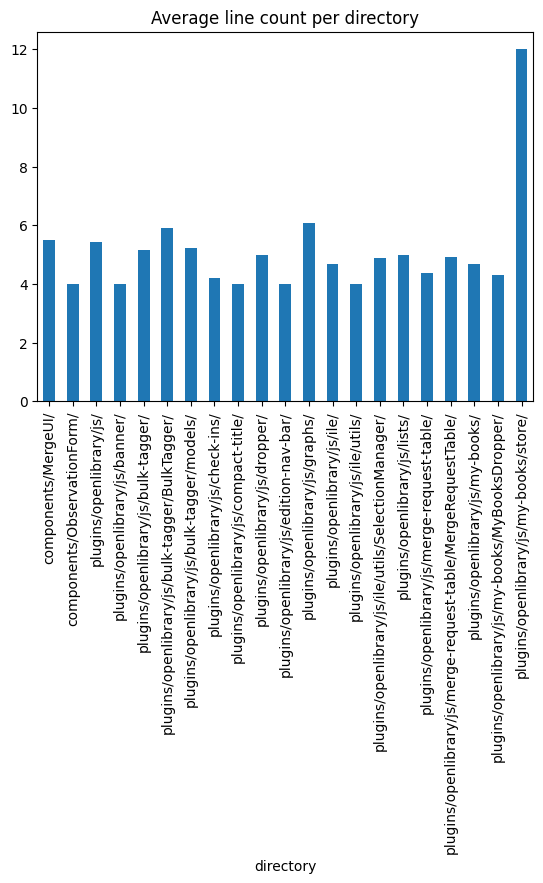

In [54]:
df_js.groupby('directory')['line_count'].mean('line_count').plot(kind='bar', title='Average line count per directory')

In [55]:
df_html = pd.read_csv('duplicates_html.csv')
df_html

,fingerprint,line_count,file,directory,start_line,end_line
0,740fa9516d9286def425519bb9de9b92,4,templates/account/email/forgot.html,templates/account/email/,1,6
1,740fa9516d9286def425519bb9de9b92,4,templates/account/email/forgot-ia.html,templates/account/email/,1,6
2,0c581a20f9c77d1acd63f6f7a8b5aef9,4,templates/admin/people/view.html,templates/admin/people/,95,99
3,0c581a20f9c77d1acd63f6f7a8b5aef9,4,templates/admin/inspect/store.html,templates/admin/inspect/,33,37
4,04f72636736585d78ad1ee178d9ed8de,4,templates/account/email/forgot.html,templates/account/email/,35,38
...,...,...,...,...,...,...
587,0aa8cc9c31cc5ca821ef9e6c8e66abfe,18,templates/publishers/view.html,templates/publishers/,85,105
588,7db9bb70ec36295019e8c828676156bd,22,templates/my_books/dropdown_content.html,templates/my_books/,82,103
589,7db9bb70ec36295019e8c828676156bd,22,macros/CreateListModal.html,macros/,9,30
590,1eced53b098c49b731163c139cc85ade,52,templates/admin/people/edits.html,templates/admin/people/,34,89


<Axes: title={'center': 'Duplicate blocks per directory'}, xlabel='directory'>

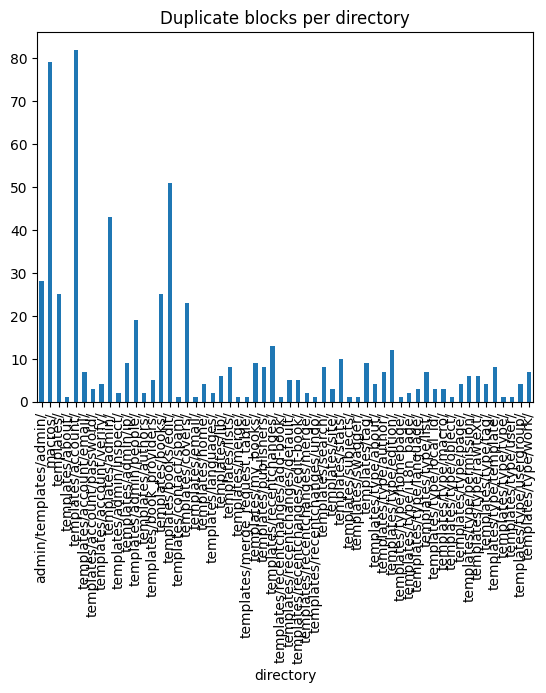

In [56]:
df_html.groupby('directory')['fingerprint'].count().plot(kind='bar', title='Duplicate blocks per directory')

<Axes: title={'center': 'Duplicate block per language'}>

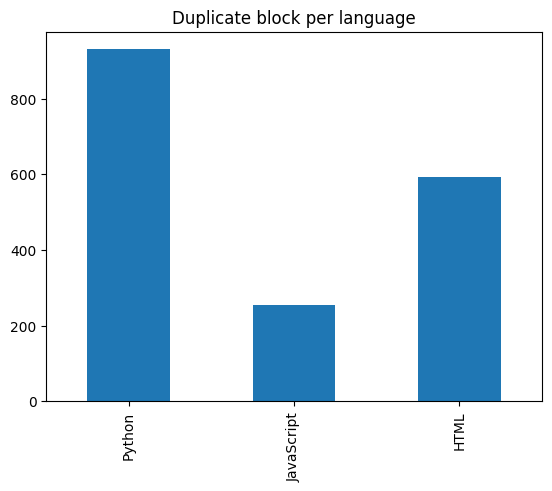

In [57]:
pd.DataFrame({'Number of duplicates': [len(df_py.index), len(df_js.index), len(df_html.index)]}, index=['Python', 'JavaScript', 'HTML']).plot(kind='bar', title='Duplicate block per language', legend=False)

<Axes: title={'center': 'Number of duplicates per block per language'}>

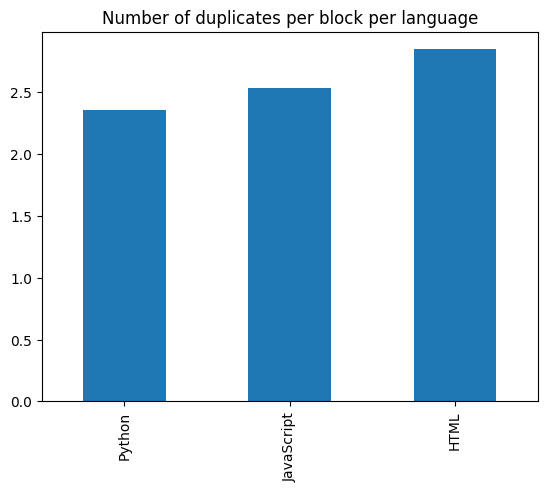

In [58]:
pd.DataFrame({'Number of duplicates': [df_py.groupby('fingerprint')['fingerprint'].agg(np.size).mean(), df_js.groupby('fingerprint')['fingerprint'].agg(np.size).mean(), df_html.groupby('fingerprint')['fingerprint'].agg(np.size).mean()]}, index=['Python', 'JavaScript', 'HTML']).plot(kind='bar', title='Number of duplicates per block per language', legend=False)